# Recommendation Engine / System
## Proyecto: Recomendador de peliculas de Netflix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##%matplotlib inline

import time
import seaborn as sns
import math
import re

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#Revisamos si tenemos valores nulos

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'valoresnulos')

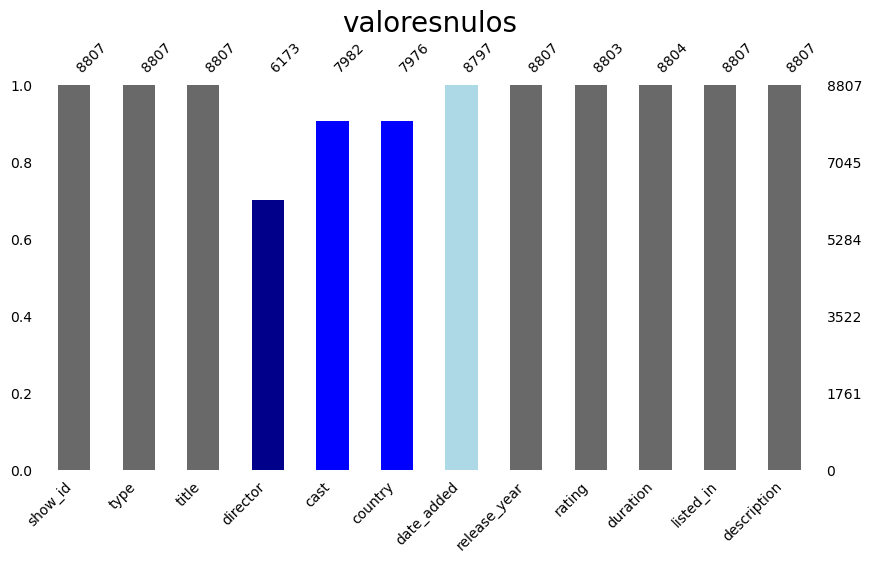

In [5]:
import missingno
color=['dimgrey', 'dimgrey', 'dimgrey', 'darkblue', 'blue', 'blue', 'lightblue', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey']
missingno.bar(df, fontsize=10, color=color, figsize=(10,5))
plt.title('valoresnulos', fontsize=20)


In [6]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']=df['rating'].fillna(df['country'].mode()[0])

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df=df.dropna(how='any', subset=['cast', 'director'])
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 2 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5700 non-null   object
 1   type          5700 non-null   object
 2   title         5700 non-null   object
 3   director      5700 non-null   object
 4   cast          5700 non-null   object
 5   country       5700 non-null   object
 6   date_added    5700 non-null   object
 7   release_year  5700 non-null   int64 
 8   rating        5700 non-null   object
 9   duration      5697 non-null   object
 10  listed_in     5700 non-null   object
 11  description   5700 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.9+ KB


## 4.4 Limpieza de los datos

In [10]:
#renombramos la listed_in como genero
df=df.rename(columns={'listed_in':'Genero'})
df['Genero']=df['Genero'].apply(lambda x: x.split(',')[0])
df['Genero'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genero, dtype: object

In [11]:
#Vamos a agregar una nueva columna year_add que es el año de la pelicula
df['year_add']=df['date_added'].apply(lambda x: x.split(',')[0])
df['year_add'].head()

2    September 24
5    September 24
6    September 24
7    September 24
8    September 24
Name: year_add, dtype: object

In [12]:
#Vamos a agregar una nueva variable month_add que son los meses
df['month_add']=df['date_added'].apply(lambda x: x.split(',')[0])
df['month_add'].head()

2    September 24
5    September 24
6    September 24
7    September 24
8    September 24
Name: month_add, dtype: object

In [13]:
df['country_main']=df['country'].apply(lambda x: x.split(',')[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [14]:
count=df['type'].value_counts()
percent=100*df['type'].value_counts(normalize=True)
pd.DataFrame({'count':count, 'percent':percent.round(1)})

,count,percent
type,,
Movie,5522,96.9
TV Show,178,3.1


In [15]:
count=df['rating'].value_counts()
percent=100*df['rating'].value_counts(normalize=True)
pd.DataFrame({'count':count, 'percent':percent.round(1)})

,count,percent
rating,,
TV-MA,1939,34.0
TV-14,1329,23.3
R,789,13.8
PG-13,477,8.4
TV-PG,456,8.0
PG,279,4.9
TV-Y7,123,2.2
TV-Y,102,1.8
TV-G,96,1.7


In [16]:
#Creamos nuevos Dataframes uno con la coleccion de peliculas y otro con la coleccion de programas de tv
movie_df=df[df['type']=='Movie']
tv_df=df[df['type']=='TV Show']
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September 24,September 24,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",September 24,September 24,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,September 24,September 24,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,September 23,September 23,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,September 22,September 22,United States


## 5.Analisis Exploratorio de Datos EDA

### Movies vs TV Shows

In [17]:
import plotly.express as px

fig=px.histogram(df,
		x='type',
		template='plotly_dark',
		color_discrete_sequence=['forestgreen', 'darkorange', 'gold', 'deeppink'],
		title='Tipo de Programas')
fig.update_layout(bargap=0.1)
fig.show()

### Analizando el Rating de Movies y TV

Text(0.5, 1.0, 'ratings de movies')

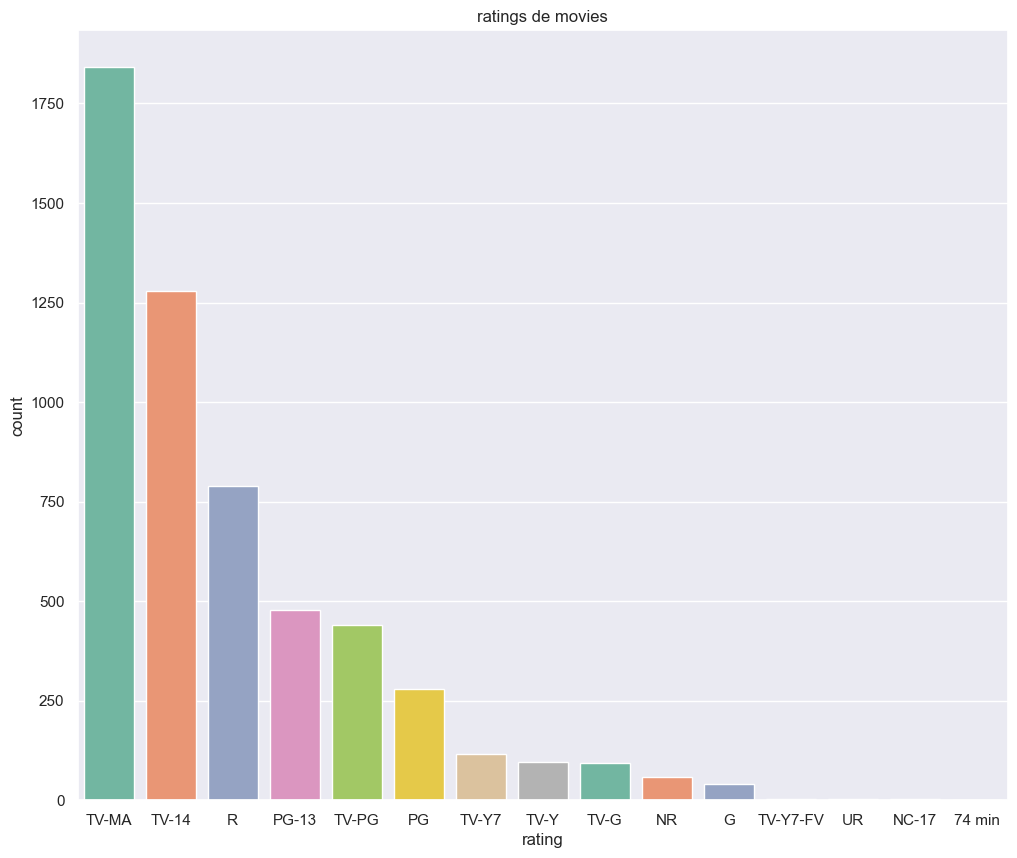

In [18]:
#Movies ratings

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])
plt.title("ratings de movies")

Text(0.5, 1.0, 'ratings de tv shows')

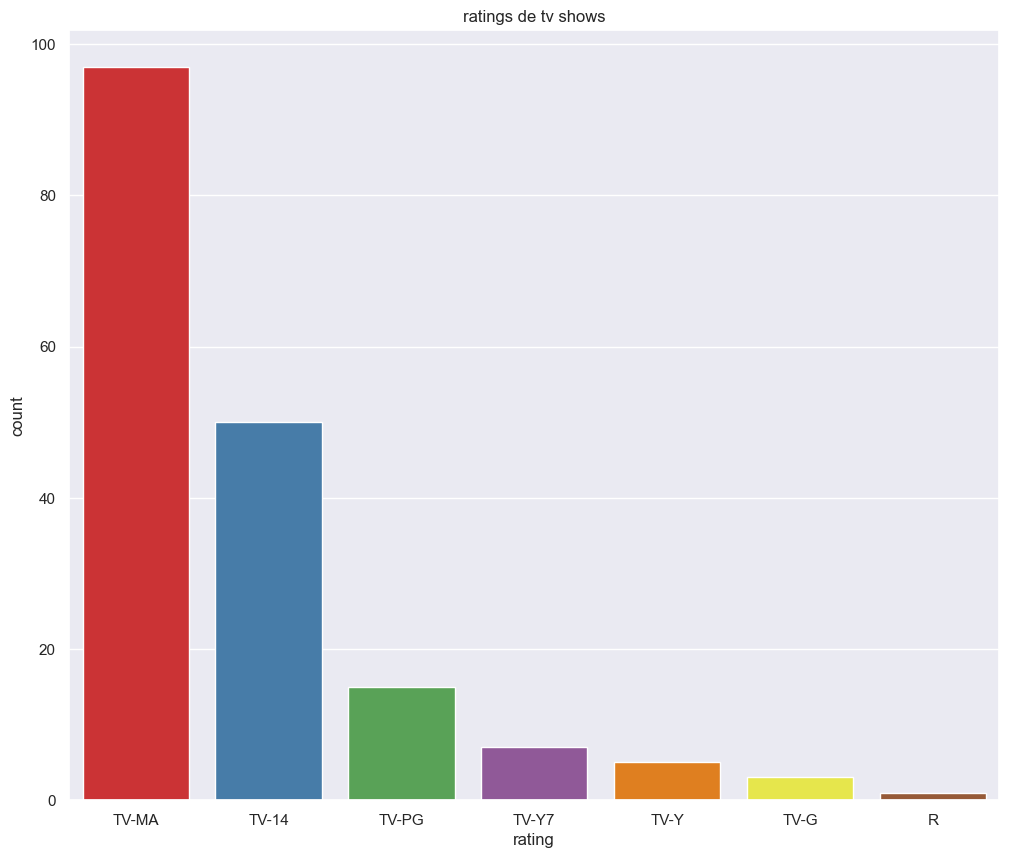

In [19]:
##Analiazando el Rating de Movies y TV Shows

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Set1", order=tv_df['rating'].value_counts().index[0:15])
plt.title("ratings de tv shows")


Text(0.5, 1.0, 'Tipo de contenido por año')

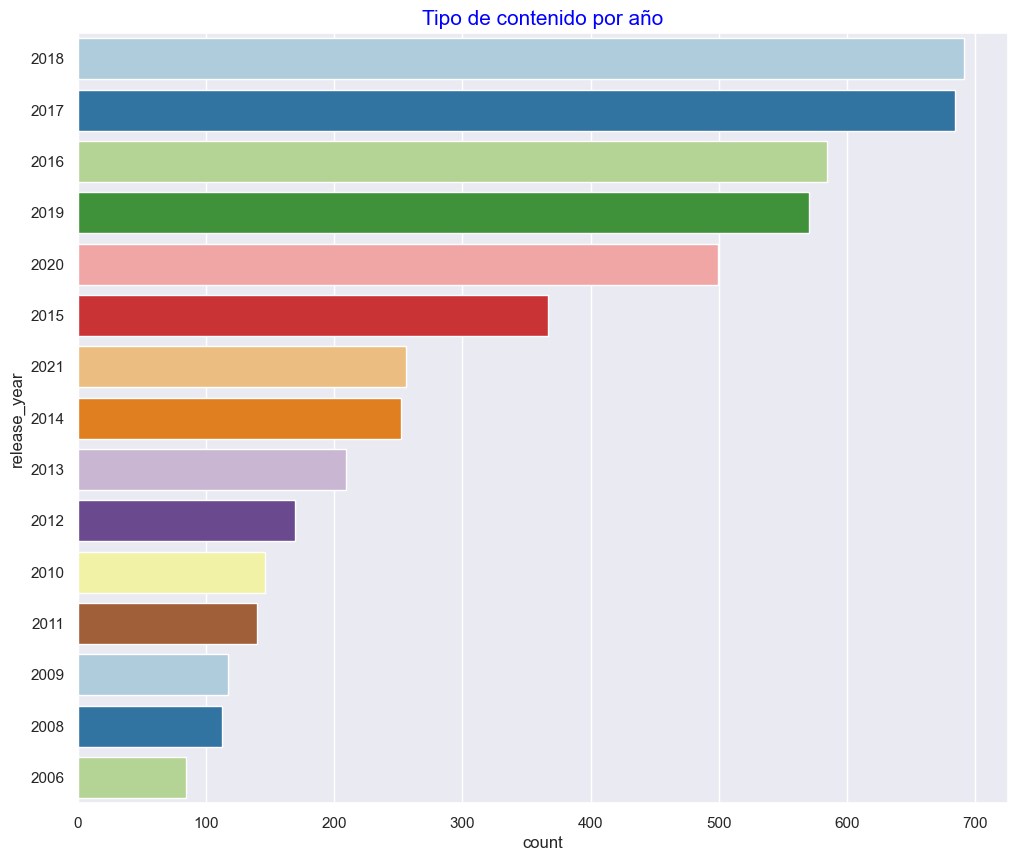

In [20]:
## Analisis de contenido por año

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data=df, palette="Paired", order=df['release_year'].value_counts().index[0:15])
plt.title("Tipo de contenido por año", fontsize=15, color='blue')

In [ ]:
#Analisis de duracion de movies

movie_df['duracion']=movie_df['duration'].str.replace('min', '')
movie_df['duracion']=movie_df['duration'].astype(int)
movie_df['duration']

In [ ]:
sns.set(style='darkgrid')
sns.kdeplot(data=movie_df['duration'], shade=True)
plt.title('Tiempo de duracion de Movie', fontsize=15, color='blue')

In [ ]:
#Tendencia de la duracion de movies
duration_year=movie_df.groupby(['release_year']).mean()
duration_year=duration_year.sort_index()

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.ylabel('Duracion de la pelicula en minutos')
plt.xlabel('Año de lanzamiento')
plt.title('Duracion de la pelicula en minutos')

In [26]:
#Analisis de TV show con mas temporadas

tv_df['duration']=tv_df['duration'].str.replace('Season', '')
tv_df['duration']=tv_df['duration'].str.replace('s', '')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

C:\Users\zukan\AppData\Local\Temp\ipykernel_17252\2120249973.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zukan\AppData\Local\Temp\ipykernel_17252\2120249973.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zukan\AppData\Local\Temp\ipykernel_17252\2120249973.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int32

In [27]:
#Extraer las columnas de tv_df

columns=['title', 'duration']
tv_shows=tv_df[columns]


In [28]:
#ordenamos el dataframe por el numero de temporadas
tv_shows=tv_shows.sort_values(by='duration', ascending=False)
top20=tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


Text(0.5, 1.0, 'Programa de TV que tiene mas temporada')

<Figure size 1000x600 with 0 Axes>

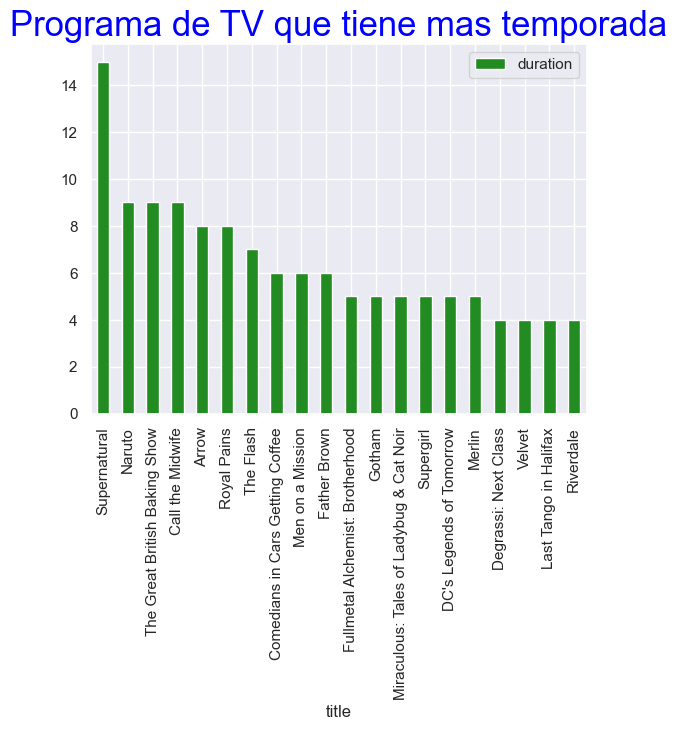

In [29]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar', x='title', y='duration', color='forestgreen')
plt.title('Programa de TV que tiene mas temporada', fontsize=25, color='blue')

NameError: name 'texts' is not defined

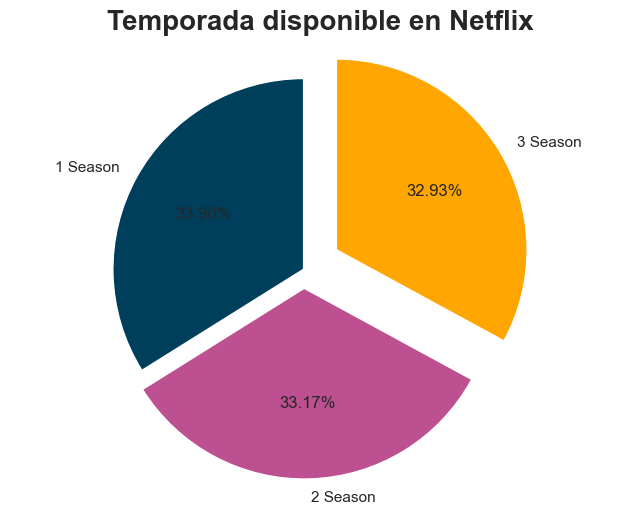

In [30]:
#TV Shows y sus temporadas

plt.figure(figsize=(8,6))
labels=['1 Season', '2 Season', '3 Season']
_, _, text =plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, explode=(0.0,0.1,0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Temporada disponible en Netflix', fontsize=20, fontweight='bold')

for text in texts:
    text.set_color('white')

AttributeError: Text.set() got an unexpected keyword argument 'fonsize'

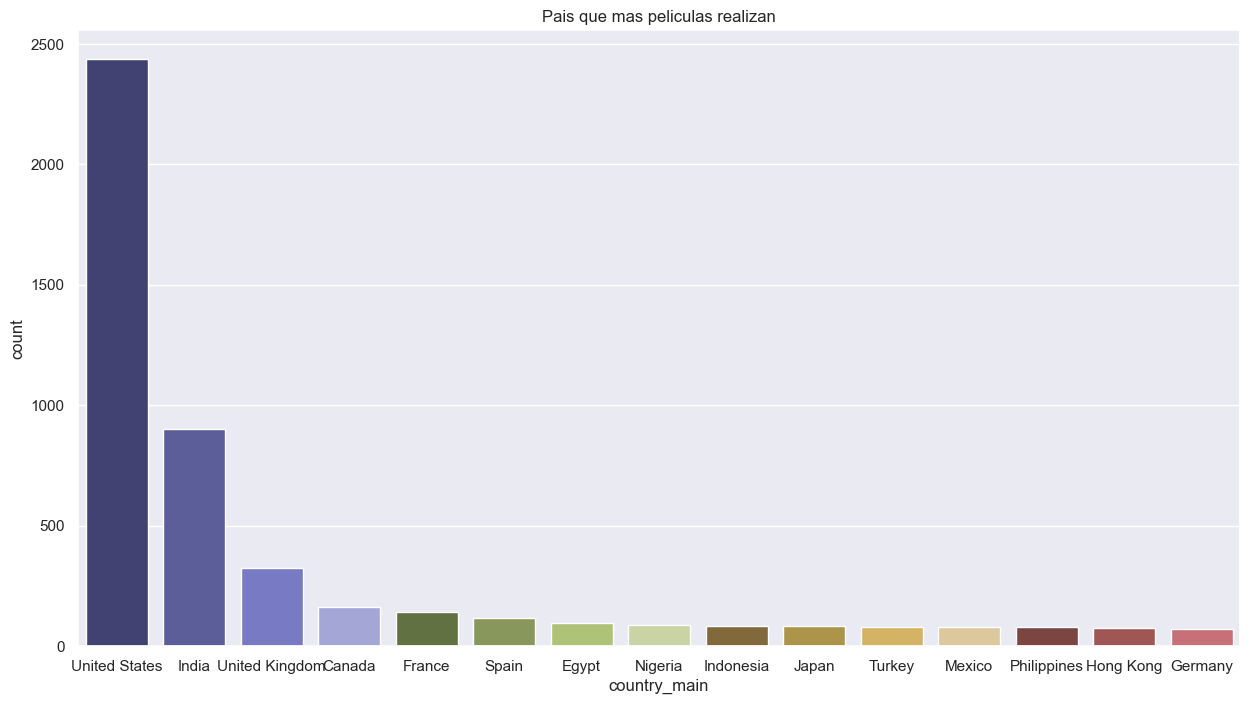

In [31]:
#Paises en la cima para la creacion de contenidos de peliculas

plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
sns.countplot(x='country_main', data=movie_df, palette='tab20b', order=movie_df['country_main'].value_counts().index[0:15])
plt.title('Pais que mas peliculas realizan', fonsize=25, color='blue')

AttributeError: Text.set() got an unexpected keyword argument 'fonsize'

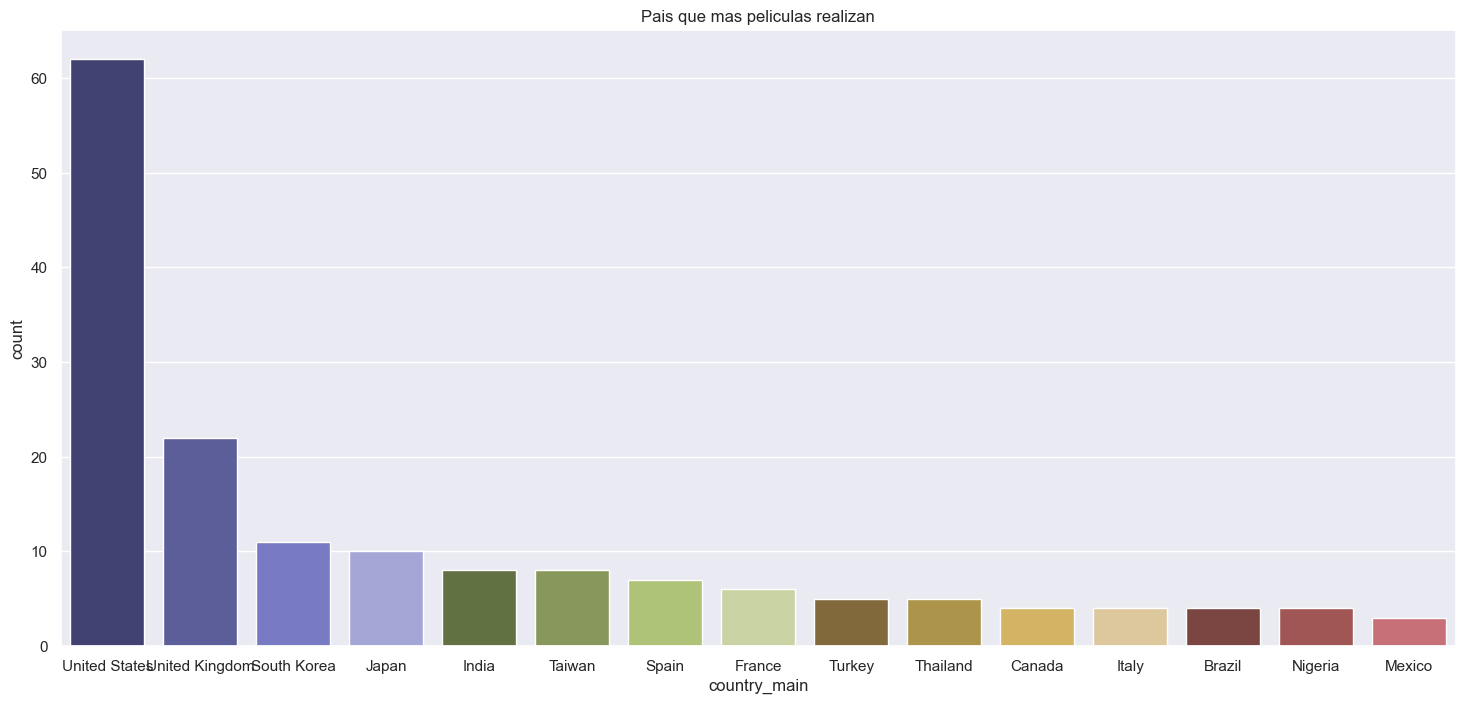

In [32]:
#Paises que crean mas TV show
plt.figure(figsize=(18,8))
sns.set(style='darkgrid')
sns.countplot(x='country_main', data=tv_df, palette='tab20b', order=tv_df['country_main'].value_counts().index[0:15])
plt.title('Pais que mas peliculas realizan', fonsize=25, color='blue')

In [33]:
#Comprender que contenido esta dispnible en diferentes paises

#Diferente genero de paises
columns=['Genero', 'country_main']
gen_country=df[columns]
gen_country.head()

,Genero,country_main
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom


In [ ]:
import squarify
%matplotlib ipympl

import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
squarify.plot(value=gen_country['Genre'], label=gen_country['country_main'], alpha=0.8)
plt.rc('font', size=14)
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'line'

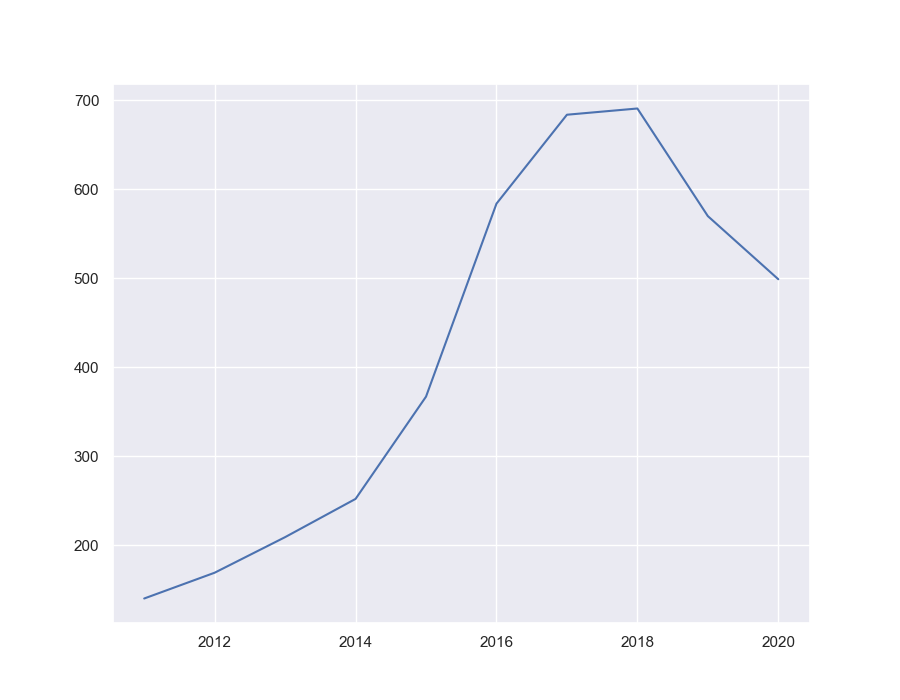

In [43]:
release=df['release_year'].value_counts()
release= release.sort_index(ascending=True)


plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='line')
plt.xticks(rotation=60)
plt.xticks(release[-11:-1].index)
plt.title('Numero de videos publicados cada año', color='Blue', fontsize=20)

In [ ]:
#Directores con mayor numero de peliculas producidas

#plt.figure(figsize=(10,8))
#sns.barplot(y=movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values)
#plt.title('Director con la mayor cantidad de peliculas', color='red', fontsize=10)
#plt.xticks(movie_df.director.value_counts()[:10].sort_values())
#plt.xlabel('Numero de peliculas lanzadas')

## 6.Sistema de recomendacion
### 6.2 Visualizacion de la descripcion basada en Recomendacion

In [48]:
df['description'].head()

2    To protect his family from a powerful drug lor...
5    The arrival of a charismatic young priest brin...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Defina un objeto vectorizador TF-IDF. Elimine todas las palabras vacias en ingles, como 'the', 'a'"19. SVD Aplicado a Sistemas de Recomendacion.ipynb"

tfidf=TfidfVectorizer(stop_words='english')


In [ ]:
#Reemplazar NaN 